In [35]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer as tf_idf
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download(['punkt', 'stopwords'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
ord('a')

97

#### 1. EDA

In [37]:
from Lab1_Pipeline import ReturnCleaned


df_new = ReturnCleaned(CountVectorizer())

ham = df_new.drop(columns=['sms_text']).groupby('class_labels').sum().loc['ham']
print(ham.idxmax(), ham.max())

gt 318


In [38]:
spam = df_new.drop(columns=['sms_text']).groupby('class_labels').sum().loc['spam']
print(spam.idxmax(), spam.max())

call 355


In [39]:
# basic bag of words model

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['sms_text', 'class_labels']).values
y = df_new['class_labels'].map({'ham': 0, 'spam': 1}).values
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7)

In [41]:
svm_model = SVC(kernel='rbf').fit(xtrain, ytrain)

In [42]:
from sklearn.metrics import f1_score, accuracy_score

In [43]:
print(accuracy_score(svm_model.predict(xtrain), ytrain), f1_score(svm_model.predict(xtrain), ytrain))
print(accuracy_score(svm_model.predict(xtest), ytest), f1_score(svm_model.predict(xtest), ytest))

0.9946140035906643 0.9798657718120806
0.9525762624967957 0.783625730994152


In [44]:
import wordcloud

In [45]:
tokens = df_new.columns.to_list()
tokens.remove('class_labels')
tokens.remove('sms_text')

In [46]:
cloud_data = ' '.join(word for word in tokens)

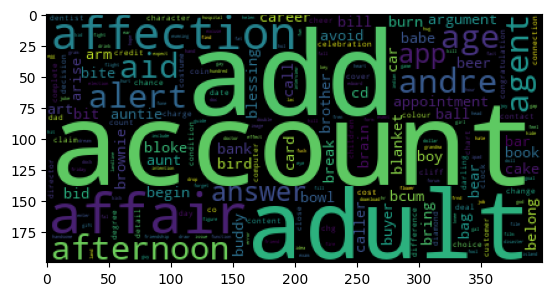

In [47]:
cloud = wordcloud.WordCloud().generate(cloud_data)
plt.imshow(cloud)